In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
icustays = pd.read_csv('Datasets/ICUSTAYS.csv.gz')
admissions = pd.read_csv('Datasets/ADMISSIONS.csv.gz')
patients = pd.read_csv('Datasets/PATIENTS.csv.gz')
diagnosis = pd.read_csv('Datasets/DIAGNOSES_ICD.csv.gz')
d_icd = pd.read_csv('Datasets/D_ICD_DIAGNOSES.csv.gz')

In [3]:
print(icustays.columns)
print(admissions.columns)
print(patients.columns)
print(diagnosis.columns)
print(d_icd.columns)

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object')
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')
Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')
Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object')


In [4]:
print(icustays.info())
print(admissions.info())
print(patients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------

In [5]:
print(icustays.isnull().sum())
print(admissions.isnull().sum())
print(patients.isnull().sum())

ROW_ID             0
SUBJECT_ID         0
HADM_ID            0
ICUSTAY_ID         0
DBSOURCE           0
FIRST_CAREUNIT     0
LAST_CAREUNIT      0
FIRST_WARDID       0
LAST_WARDID        0
INTIME             0
OUTTIME           10
LOS               10
dtype: int64
ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64
ROW_ID             0
SUBJECT_ID         0
GENDER             0
DOB                0
DOD            30761
DOD_HOSP       36546
DOD_SSN        33142
EXPIR

In [6]:
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


<AxesSubplot:>

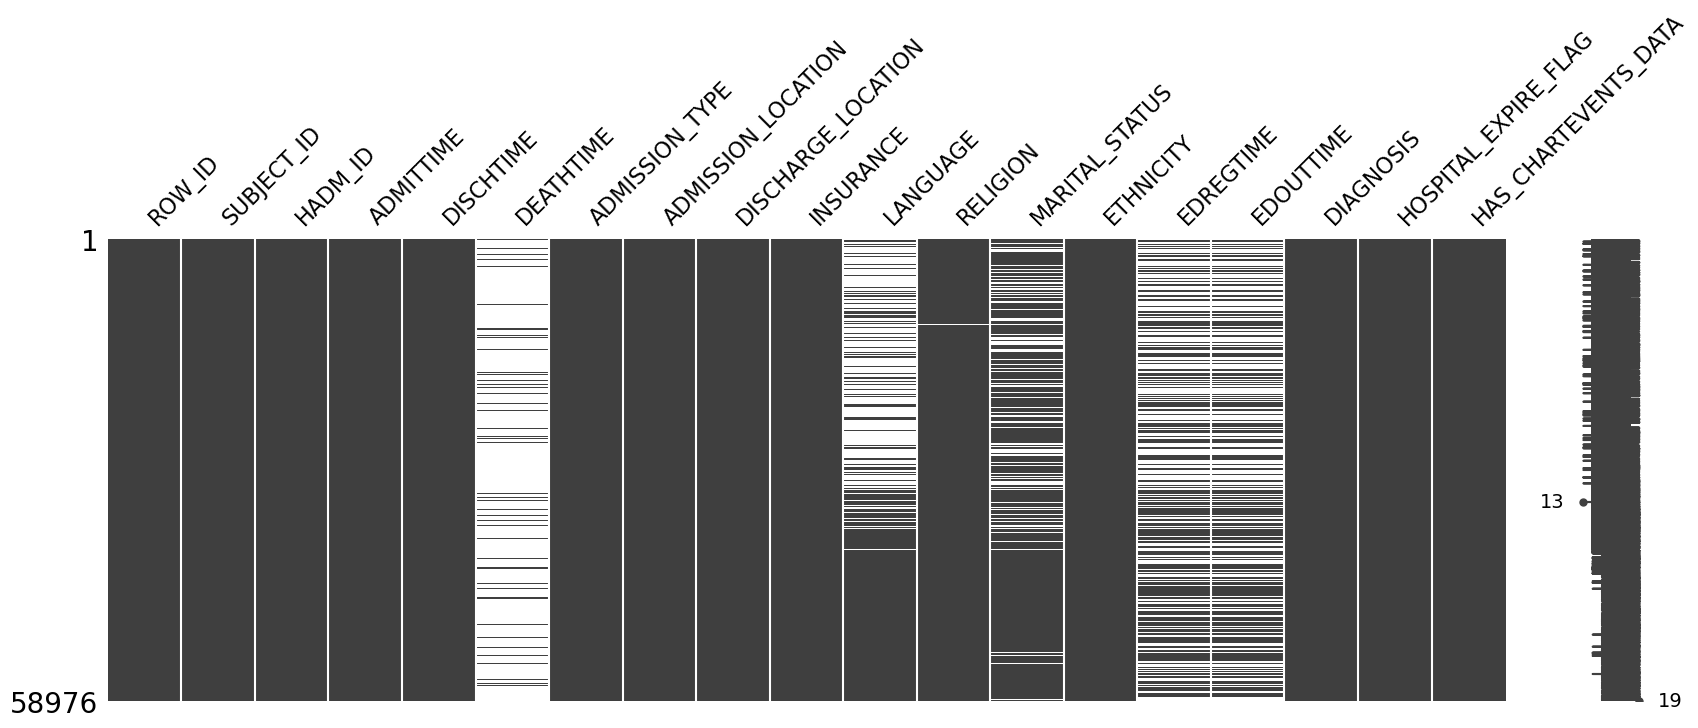

In [7]:
mno.matrix(admissions, figsize = (20,6))

<AxesSubplot:>

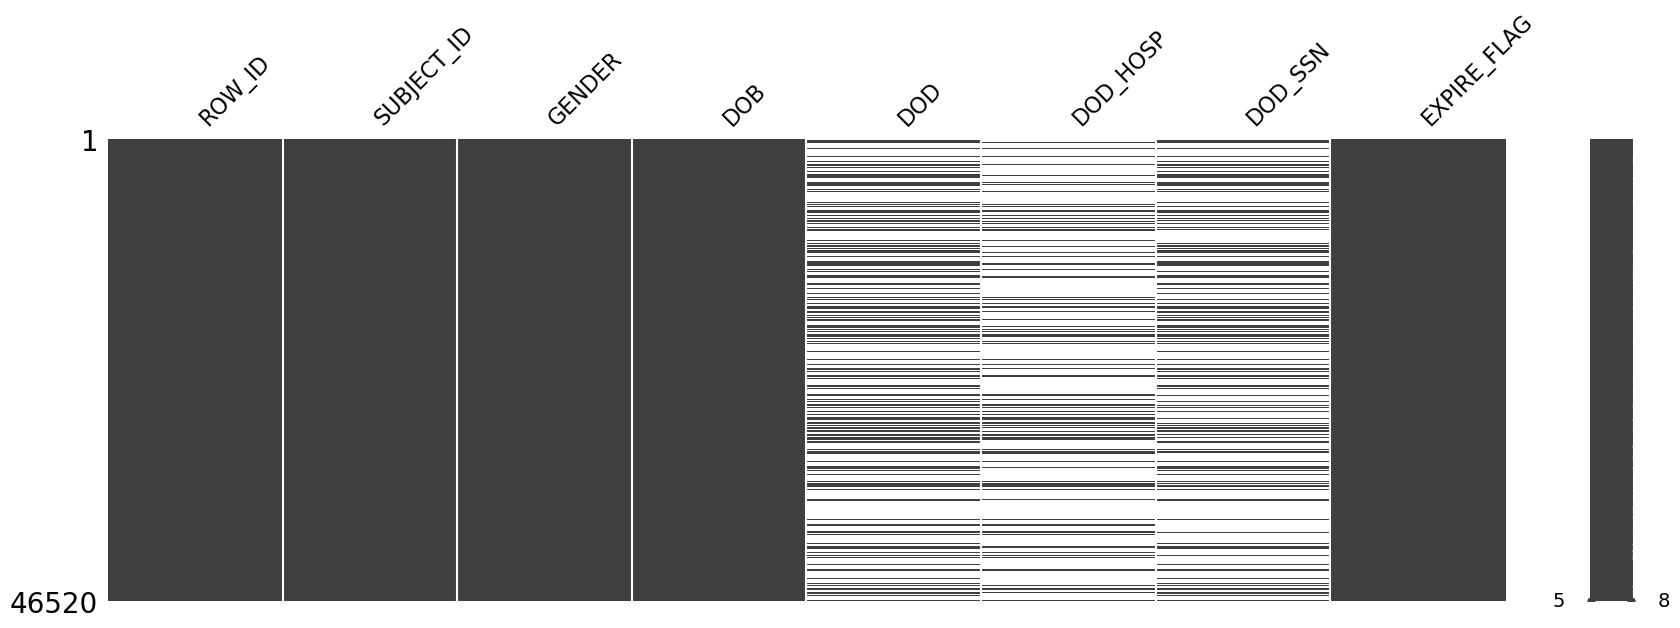

In [8]:
mno.matrix(patients, figsize = (20,6))

## Icustays: 
There are 10 missing values in the OUTTIME and LOS columns. Since the number of missing values is very small compared to the total number of entries, one approach could be to simply remove these rows from the dataset

In [9]:
icustays = icustays.dropna(subset=['OUTTIME', 'LOS'])

# Religion column in admissions 
As there are less number of values missing we can replace with the mode of the column

In [10]:
most_common = admissions['RELIGION'].mode()[0]
admissions['RELIGION'] = admissions['RELIGION'].fillna(most_common)

## Add age to icustays: 
We calculate the age of the patient at the time of their ICU stay. We do this by subtracting the patient's date of birth from the ICU admission time. If the calculated age is greater than 89, we set it to 300 to maintain patient anonymity.

In [11]:
icustays['INTIME'] = pd.to_datetime(icustays['INTIME'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patients['DOB'] = pd.to_datetime(patients['DOB'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

icustays = icustays.merge(patients[['SUBJECT_ID', 'GENDER','DOB']], on='SUBJECT_ID', how='left')
icustays['AGE'] = (icustays['INTIME'].dt.year - icustays['DOB'].dt.year)
icustays.loc[icustays['AGE'] > 89, 'AGE'] = 300

In [12]:
icustays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,GENDER,DOB,AGE
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,F,2132-02-21,66
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,M,2130-09-30,40
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,M,2048-05-26,80
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,F,2074-11-30,46
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,M,2119-11-21,67


## 'Deathtime' in admissions
This column has a large number of missing values because it only has entries for patients who died during their hospital stay. We can create a new column MORTALITY which is 1 if DEATHTIME is not null, and 0 otherwise. Then, we can drop the DEATHTIME column

In [13]:
admissions['DEATHTIME'] = pd.to_datetime(admissions['DEATHTIME'])
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'])
admissions['MORTALITY'] = admissions['DEATHTIME'].notnull().astype('int')
icustays = icustays.merge(admissions[['HADM_ID', 'MORTALITY']], on='HADM_ID', how='left')

## Filter icustays on age: 
We filter the icustays DataFrame to only include ICU stays where the patient's age is within a certain range. For example, to only include ICU stays where the patient's age is greater than 18

In [14]:
icustays = icustays.loc[icustays['AGE'] >= 18]
icustays = icustays.loc[icustays['FIRST_CAREUNIT'] == icustays['LAST_CAREUNIT']]

## Merge the datasets: 
You can merge the icustays and admissions datasets on the 'SUBJECT_ID' and 'HADM_ID' columns, which are common to both datasets. This will give you a combined dataset that includes information from both the ICU stays and the hospital admissions.

In [15]:
combined_data = pd.merge(icustays, admissions, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

In [16]:
combined_data.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS', 'GENDER', 'DOB', 'AGE', 'MORTALITY_x',
       'ROW_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA',
       'MORTALITY_y'],
      dtype='object')

In [17]:
combined_data.drop(columns = ['ROW_ID_y','MORTALITY_y'],inplace = True)
combined_data = combined_data.rename(columns={"ROW_ID_x": "ROW_ID", "MORTALITY_x": "MORTALITY"})

In [18]:
# ok so deathtime is no longer needed 
combined_data.drop(columns = 'DEATHTIME',inplace = True)

In [19]:
combined_data.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
DBSOURCE                    0
FIRST_CAREUNIT              0
LAST_CAREUNIT               0
FIRST_WARDID                0
LAST_WARDID                 0
INTIME                      0
OUTTIME                     0
LOS                         0
GENDER                      0
DOB                         0
AGE                         0
MORTALITY                   0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                16726
RELIGION                    0
MARITAL_STATUS           2266
ETHNICITY                   0
EDREGTIME               19307
EDOUTTIME               19307
DIAGNOSIS                   1
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

## 'LANGUAGE': 
This column represents the patient's language. If it's missing, it might be because the patient's language was not recorded. We could fill in the missing values with a value like 'UNKNOWN' to indicate that the language is unknown.

In [20]:
combined_data['LANGUAGE'].fillna('UNKNOWN', inplace=True)

## 'MARITAL_STATUS':
This column represents the patient's marital status. If it's missing, it might be because the patient's marital status was not recorded. Similar to 'LANGUAGE', we ould fill in the missing values with 'UNKNOWN'.

In [21]:
combined_data['MARITAL_STATUS'].fillna('UNKNOWN', inplace=True)

## 'EDREGTIME' and 'EDOUTTIME': 
These columns represent the time the patient was registered and discharged from the emergency department. If they're missing, it might be because the patient did not visit the emergency department during their hospital stay. We could fill in the missing values with a default value, or we could create a new binary column that indicates whether the patient visited the emergency department. In this case we will create a new column called ED_VISIT which indicates if the patient visited the emergency depratment

In [22]:
combined_data['ED_VISIT'] = ~combined_data['EDREGTIME'].isna()

In [23]:
combined_data.drop(['EDREGTIME', 'EDOUTTIME'], axis=1, inplace=True)

## Diagnosis
As there is only 1 value missing, it might be because the patient's diagnosis was not recorded. We can drop this column 


In [24]:
combined_data.dropna(subset=['DIAGNOSIS'], inplace=True)

In [25]:
combined_data.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS', 'GENDER', 'DOB', 'AGE', 'MORTALITY',
       'ADMITTIME', 'DISCHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'ED_VISIT'],
      dtype='object')

### Checking for duplicate rows 

In [26]:
print("Number of duplicate rows: ", combined_data.duplicated().sum())

Number of duplicate rows:  0


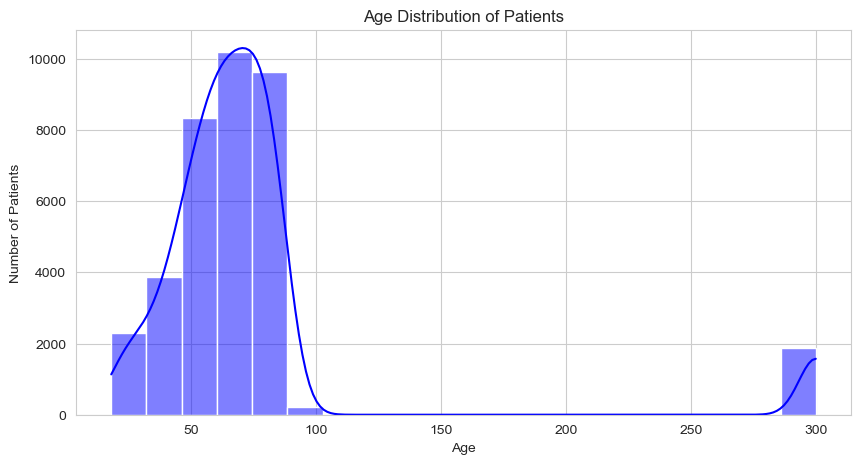

In [41]:
sns.set_style("whitegrid")
diagnoses_counts = unique_patients['DIAGNOSIS'].value_counts().nlargest(10)
# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(unique_patients['AGE'], bins=20, color='blue', kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

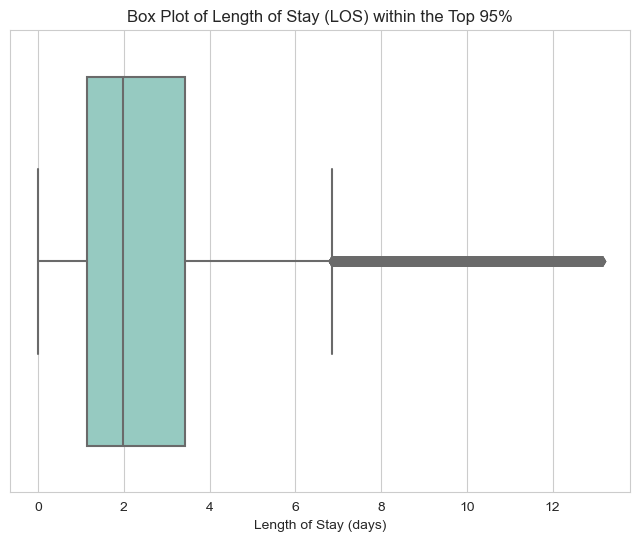

In [28]:
# Calculate the 95th percentile of the LOS data
percentile_95 = combined_data['LOS'].quantile(0.95)

# Filter the data to include only values below the 95th percentile
filtered_df = combined_data[combined_data['LOS'] <= percentile_95]

# Box plot of Length of Stay (LOS) within the top 95%
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['LOS'], palette='Set3')
plt.title('Box Plot of Length of Stay (LOS) within the Top 95%')
plt.xlabel('Length of Stay (days)')
plt.show()

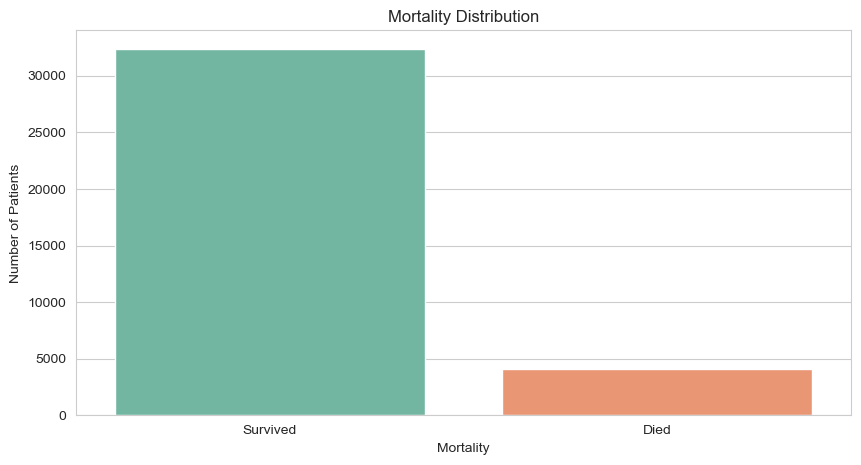

In [48]:
# 3. Mortality
plt.figure(figsize=(10, 5))
sns.countplot(x=unique_patients['MORTALITY'], palette='Set2')
plt.title('Mortality Distribution')
plt.xlabel('Mortality')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Survived', 'Died'])
plt.show()

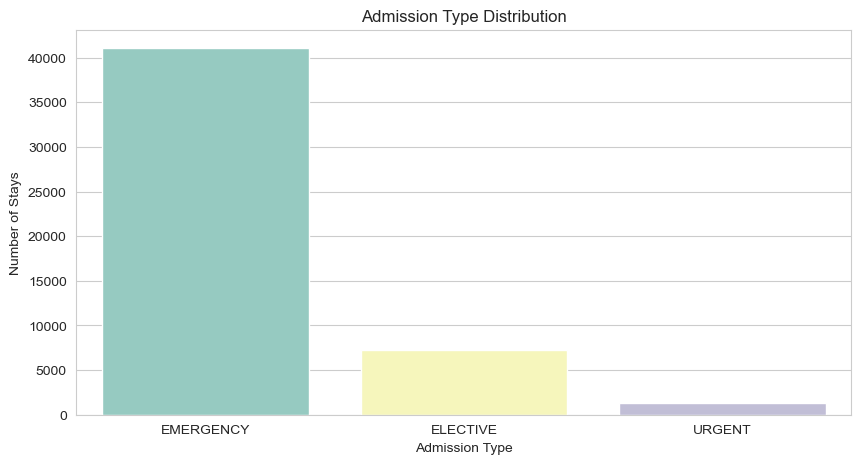

In [49]:
# 4. Admission Type
plt.figure(figsize=(10, 5))
sns.countplot(x=combined_data['ADMISSION_TYPE'], palette='Set3')
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Number of Stays')
plt.show()

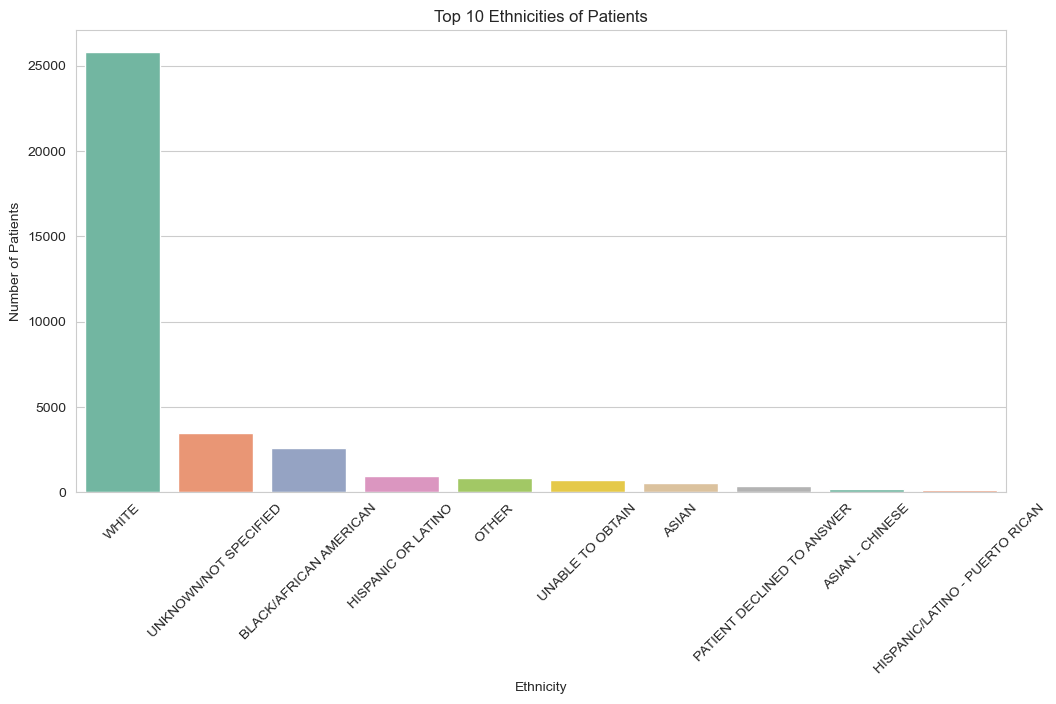

In [40]:
# 6. Ethnicity
plt.figure(figsize=(12, 6))
ethnicity_counts = unique_patients['ETHNICITY'].value_counts().nlargest(10)
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette='Set2')
plt.title('Top 10 Ethnicities of Patients')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

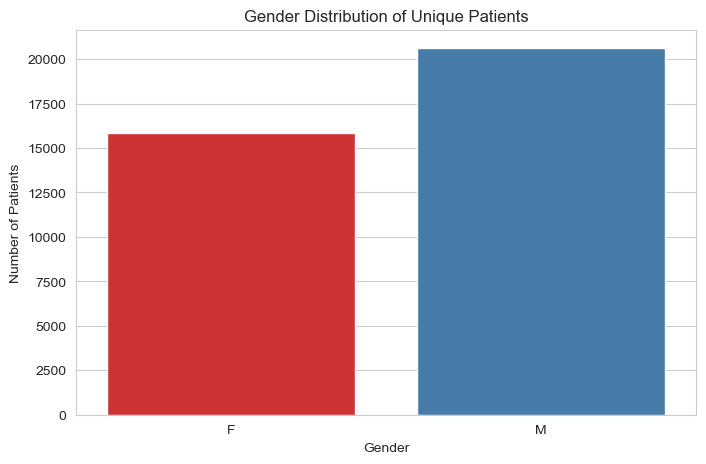

In [38]:
unique_patients = combined_data.drop_duplicates(subset='SUBJECT_ID')

# Plotting
plt.figure(figsize=(8, 5))
sns.countplot(x=unique_patients['GENDER'], palette='Set1')
plt.title('Gender Distribution of Unique Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

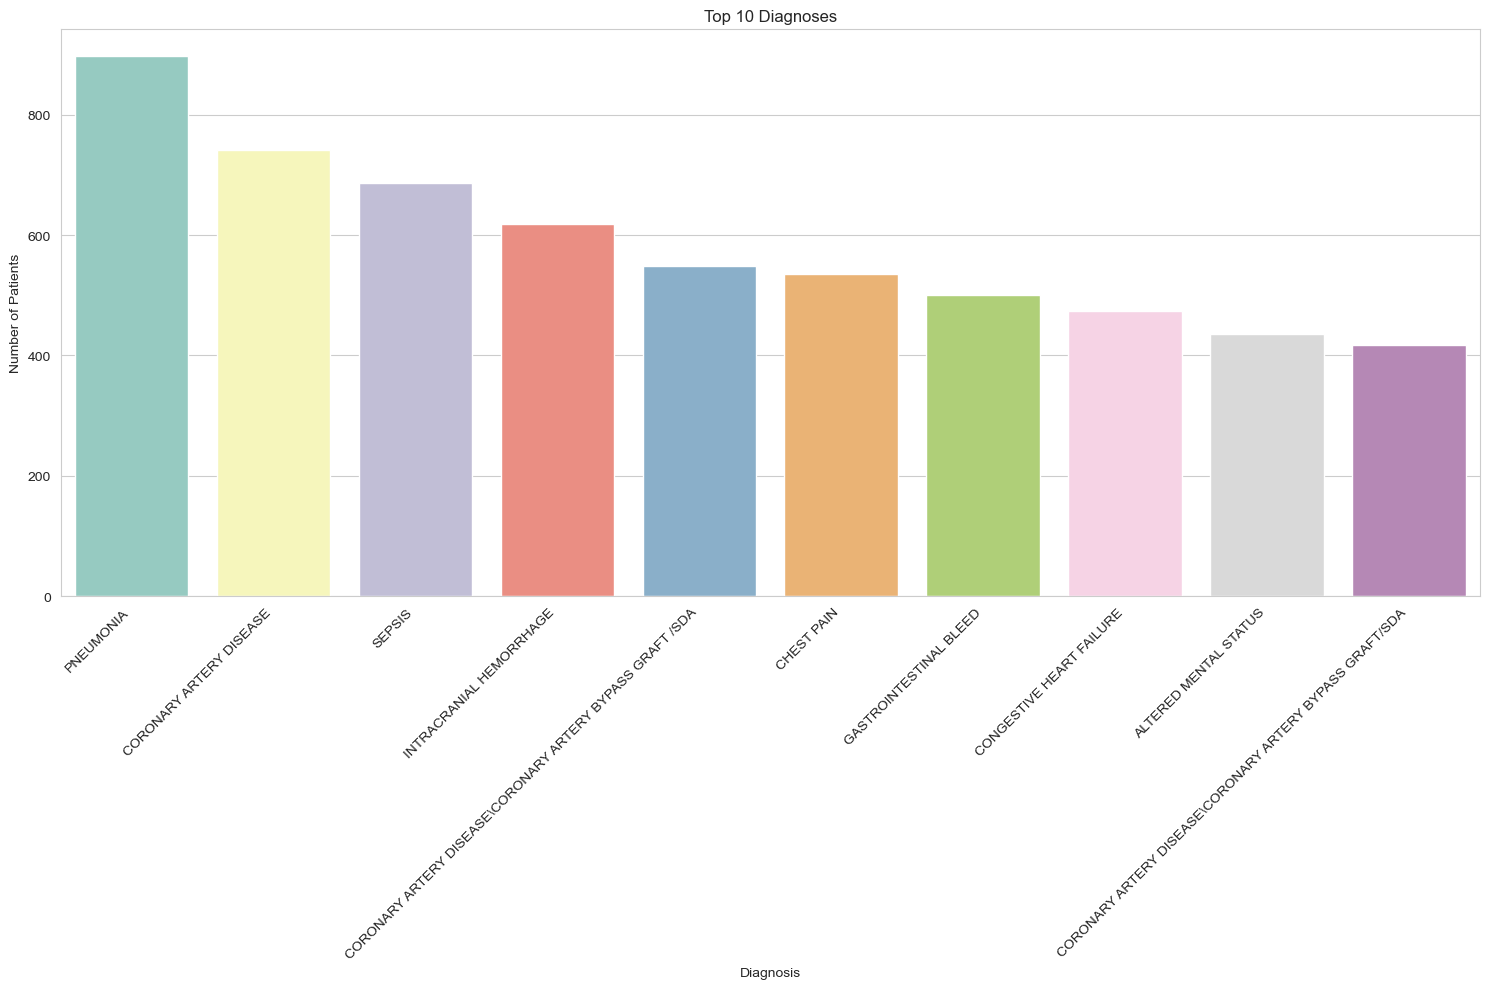

In [39]:
plt.figure(figsize=(15, 10))
diagnoses_counts = unique_patients['DIAGNOSIS'].value_counts().nlargest(10)
ax = sns.barplot(x=diagnoses_counts.index, y=diagnoses_counts.values, palette='Set3')
plt.title('Top 10 Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

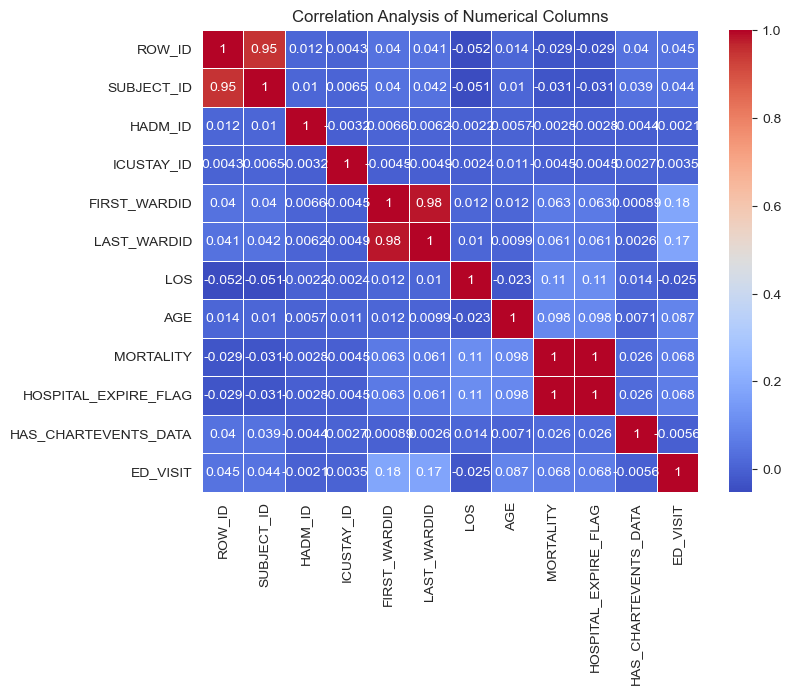

In [34]:
corr = combined_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis of Numerical Columns')
plt.show()

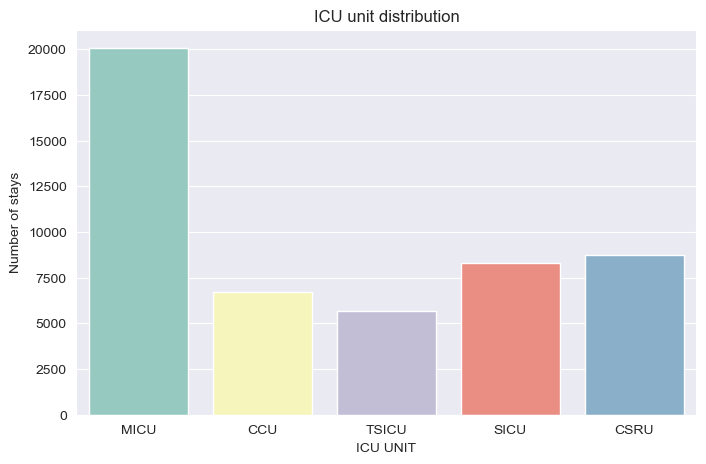

In [52]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
sns.countplot(x=combined_data['LAST_CAREUNIT'], palette='Set3')
plt.title('ICU unit distribution')
plt.xlabel('ICU UNIT')
plt.ylabel('Number of stays')
plt.show()

In [47]:
combined_data['DBSOURCE'].value_counts()

carevue       27236
metavision    22187
both            103
Name: DBSOURCE, dtype: int64

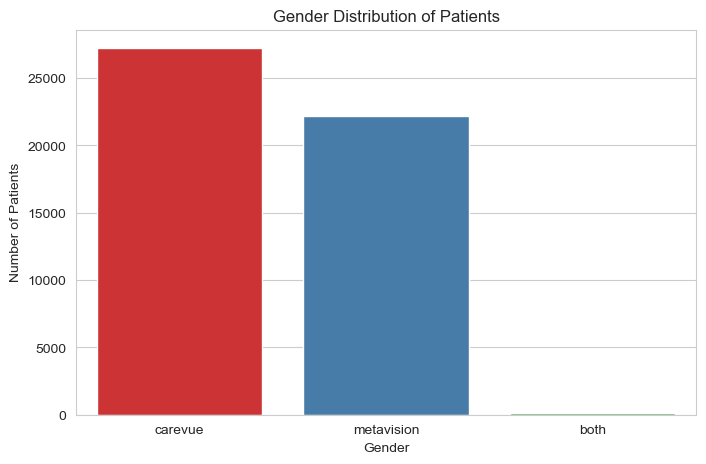

In [43]:
# 7. Gender
plt.figure(figsize=(8, 5))
sns.countplot(x=combined_data['DBSOURCE'], palette='Set1')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

In [45]:
import pandas as pd

# Assuming you have loaded your data into a DataFrame called combined_data
# combined_data = pd.read_csv('path_to_your_data.csv')

# Select the columns of interest
selected_columns = ['AGE', 'GENDER', 'ETHNICITY', 'DBSOURCE', 'LAST_CAREUNIT', 'ADMISSION_TYPE']
subset_data = combined_data[selected_columns]

# Create an overview table
overview_table = pd.DataFrame()

# For numerical columns like 'AGE', we can provide mean, min, max, etc.
overview_table['AGE'] = ['Mean', 'Min', 'Max']
overview_table['AGE_values'] = [subset_data['AGE'].mean(), subset_data['AGE'].min(), subset_data['AGE'].max()]

# For categorical columns, we can provide the count of unique values or the most common value
for col in ['GENDER', 'ETHNICITY', 'DBSOURCE', 'LAST_CAREUNIT', 'ADMISSION_TYPE']:
    overview_table[col] = [f"Unique values: {subset_data[col].nunique()}", 
                           f"Most common: {subset_data[col].mode().iloc[0]}",
                           f"Count: {subset_data[col].value_counts().iloc[0]}"]

print(overview_table)


    AGE  AGE_values            GENDER           ETHNICITY  \
0  Mean   74.832472  Unique values: 2   Unique values: 41   
1   Min   18.000000    Most common: M  Most common: WHITE   
2   Max  311.000000      Count: 27880        Count: 35133   

               DBSOURCE      LAST_CAREUNIT          ADMISSION_TYPE  
0      Unique values: 3   Unique values: 5        Unique values: 3  
1  Most common: carevue  Most common: MICU  Most common: EMERGENCY  
2          Count: 27236       Count: 20064            Count: 41072  


In [48]:
# Modify the index for better understanding
overview_table.index = ['General Information', 'Most Common Value', 'Statistics for Most Common Value']

# Update the AGE column to be more descriptive
overview_table['AGE'] = ['Average Age: ' + str(round(overview_table['AGE_values']['General Information'], 2)),
                         'Youngest Age: ' + str(int(overview_table['AGE_values']['Most Common Value'])),
                         'Oldest Age: ' + str(int(overview_table['AGE_values']['Statistics for Most Common Value']))]
overview_table.drop(columns=['AGE_values'], inplace=True)

# Update the other columns to be more descriptive
for col in ['GENDER', 'ETHNICITY', 'DBSOURCE', 'LAST_CAREUNIT', 'ADMISSION_TYPE']:
    overview_table[col]['General Information'] = f"There are {overview_table[col]['General Information'].split(': ')[1]} unique {col.lower()} values."
    overview_table[col]['Most Common Value'] = f"The most common {col.lower()} is {overview_table[col]['Most Common Value'].split(': ')[1]}."
    overview_table[col]['Statistics for Most Common Value'] = f"This value occurs {overview_table[col]['Statistics for Most Common Value'].split(': ')[1]} times."

print(overview_table)


                                                 AGE  \
General Information               Average Age: 74.83   
Most Common Value                   Youngest Age: 18   
Statistics for Most Common Value     Oldest Age: 311   

                                                             GENDER  \
General Information               There are 2 unique gender values.   
Most Common Value                      The most common gender is M.   
Statistics for Most Common Value     This value occurs 27880 times.   

                                                              ETHNICITY  \
General Information               There are 41 unique ethnicity values.   
Most Common Value                   The most common ethnicity is WHITE.   
Statistics for Most Common Value         This value occurs 35133 times.   

                                                              DBSOURCE  \
General Information                There are 3 unique dbsource values.   
Most Common Value                 The mos

In [170]:
combined_data[combined_data['MORTALITY']==1]['LAST_CAREUNIT'].value_counts()

MICU     3106
SICU     1064
CCU       758
TSICU     634
CSRU      321
Name: LAST_CAREUNIT, dtype: int64

In [171]:
combined_data['LAST_CAREUNIT'].value_counts()

MICU     20064
CSRU      8753
SICU      8298
CCU       6714
TSICU     5697
Name: LAST_CAREUNIT, dtype: int64

## Consistency of Categorical Variables: 
Check the unique values of your categorical variables. Sometimes, the same category might be represented in different ways. For example, 'Male' and 'male' would be considered two different categories due to the difference in case.

In [25]:
features = []
for col in combined_data.select_dtypes(include=['object']).columns:
    if len(combined_data[col].unique()) < 50:
        print(col, combined_data[col].unique())
        features.append(str(col))

DBSOURCE ['carevue' 'metavision' 'both']
FIRST_CAREUNIT ['MICU' 'CCU' 'TSICU' 'SICU' 'CSRU']
LAST_CAREUNIT ['MICU' 'CCU' 'TSICU' 'SICU' 'CSRU']
GENDER ['F' 'M']
ADMISSION_TYPE ['EMERGENCY' 'ELECTIVE' 'URGENT']
ADMISSION_LOCATION ['EMERGENCY ROOM ADMIT' 'PHYS REFERRAL/NORMAL DELI'
 'TRANSFER FROM HOSP/EXTRAM' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM OTHER HEALT' 'TRANSFER FROM SKILLED NUR'
 'HMO REFERRAL/SICK' '** INFO NOT AVAILABLE **'
 'TRSF WITHIN THIS FACILITY']
DISCHARGE_LOCATION ['DEAD/EXPIRED' 'HOME HEALTH CARE' 'HOME' 'REHAB/DISTINCT PART HOSP' 'SNF'
 'HOSPICE-MEDICAL FACILITY' 'HOSPICE-HOME' 'DISC-TRAN CANCER/CHLDRN H'
 'LONG TERM CARE HOSPITAL' 'LEFT AGAINST MEDICAL ADVI'
 'SHORT TERM HOSPITAL' 'HOME WITH HOME IV PROVIDR'
 'DISC-TRAN TO FEDERAL HC' 'DISCH-TRAN TO PSYCH HOSP' 'ICF'
 'OTHER FACILITY' 'SNF-MEDICAID ONLY CERTIF']
INSURANCE ['Medicare' 'Medicaid' 'Private' 'Government' 'Self Pay']
RELIGION ['CATHOLIC' 'UNOBTAINABLE' "JEHOVAH'S WITNESS" 'OTHER' 'PROTESTANT QUAKER

In [26]:
combined_data.dtypes

ROW_ID                           int64
SUBJECT_ID                       int64
HADM_ID                          int64
ICUSTAY_ID                       int64
DBSOURCE                        object
FIRST_CAREUNIT                  object
LAST_CAREUNIT                   object
FIRST_WARDID                     int64
LAST_WARDID                      int64
INTIME                  datetime64[ns]
OUTTIME                         object
LOS                            float64
GENDER                          object
DOB                     datetime64[ns]
AGE                              int64
MORTALITY                        int32
ADMITTIME                       object
DISCHTIME               datetime64[ns]
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
DISCHARGE_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                

In [27]:
combined_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ED_VISIT
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,DEAD/EXPIRED,Medicare,UNKNOWN,CATHOLIC,SEPARATED,HISPANIC OR LATINO,DYSPNEA,1,1,True
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,...,HOME HEALTH CARE,Medicaid,UNKNOWN,UNOBTAINABLE,SINGLE,WHITE,SEPSIS;PILONIDAL ABSCESS,0,1,True
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,...,HOME HEALTH CARE,Medicare,UNKNOWN,JEHOVAH'S WITNESS,MARRIED,UNKNOWN/NOT SPECIFIED,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,0,1,False
3,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,...,HOME,Medicare,UNKNOWN,UNOBTAINABLE,MARRIED,WHITE,PULMONARY EMBOLIS,0,1,False
4,370,273,158689,241507,carevue,MICU,MICU,52,52,2141-04-19 06:12:05,...,HOME,Private,ENGL,OTHER,MARRIED,BLACK/AFRICAN AMERICAN,POLYSUBSTANCE OVERDOSE,0,1,True


In [28]:
combined_data.shape

(49526, 30)

<AxesSubplot:xlabel='MORTALITY', ylabel='count'>

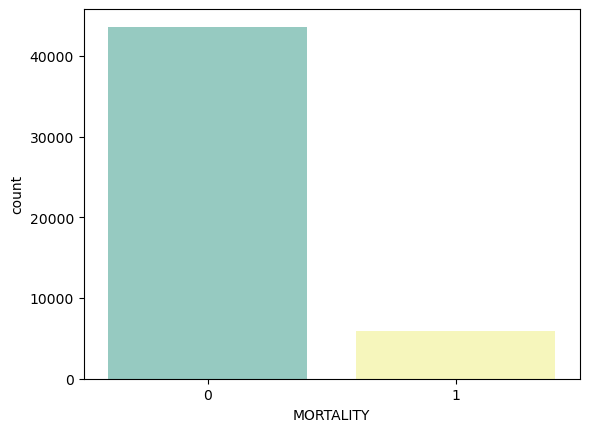

In [29]:
sns.countplot(x = 'MORTALITY', data = combined_data, palette = 'Set3')

In [30]:
combined_data['MORTALITY'].value_counts()
# The moratlity column is imballenced 

0    43643
1     5883
Name: MORTALITY, dtype: int64

In [31]:
features

['DBSOURCE',
 'FIRST_CAREUNIT',
 'LAST_CAREUNIT',
 'GENDER',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY']

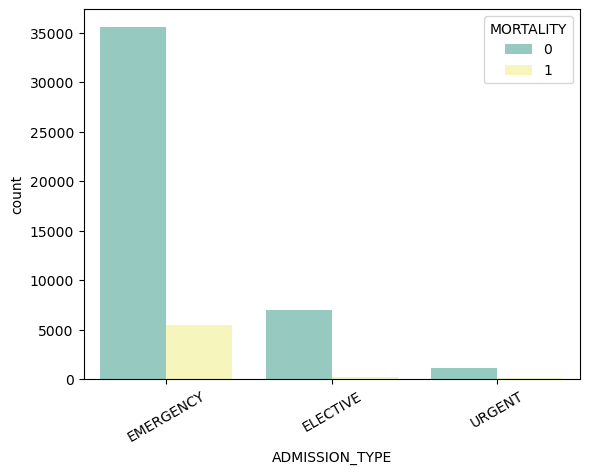

In [32]:
sns.countplot(x='ADMISSION_TYPE', data = combined_data, palette = 'Set3', hue = 'MORTALITY')
plt.xticks(rotation = 30)
plt.show()

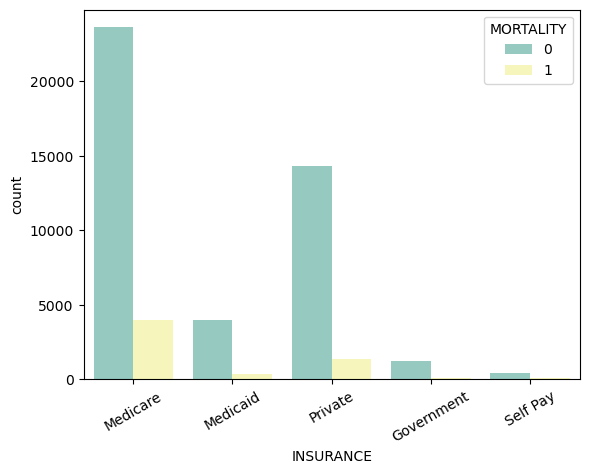

In [33]:
sns.countplot(x='INSURANCE', data = combined_data, palette = 'Set3', hue = 'MORTALITY')
plt.xticks(rotation = 30)
plt.show()

In [34]:
def transform_gender(df):
    # Define a mapping from gender categories to integers
    gender_map = {'F': 1, 'M': 2, 'OTHER': 3, '': 0}
    # Apply the mapping to the 'GENDER' column
    df['GENDER'] = df['GENDER'].map(gender_map).fillna(0).astype(int)


In [35]:
transform_gender(combined_data)

In [38]:
combined_data['GENDER']

0        1
1        2
2        2
3        2
4        2
        ..
49522    2
49523    1
49524    1
49525    1
49526    2
Name: GENDER, Length: 49526, dtype: int32

In [44]:
diagnosis

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [49]:
icustays.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object')